In [155]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import math
from lmfit.lineshapes import *
from lmfit.models import GaussianModel, LorentzianModel

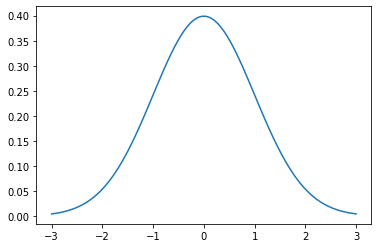

In [95]:
# Define basic gaussian function: A = amplitude, mu = mean, sigma = standard deviation
def g(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))

# Generate example data and plot gaussian function
x = np.linspace(-3, 3, 100)
y = g(x, 1, 0, 1) 
fig, ax = plt.subplots()
ax.plot(x, g(x, 1, 0, 1))

In [96]:
# Load the pre-built gaussian model found with the lmfit module.
model = GaussianModel()
pars = model.guess(y, x=x)  #The parameters for the gaussian module (amplitude, mean, sigma) are guessed by input
out = model.fit(y, pars, x=x) # Fit of gaussian model to input data

In [97]:
print(out.fit_report(min_correl = 0.25)) # Fit Report

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 2.8257e-31
    reduced chi-square = 2.9131e-33
    Akaike info crit   = -7488.65465
    Bayesian info crit = -7480.83914
##  Warning: uncertainties could not be estimated:
    center:     at initial value
[[Variables]]
    amplitude:  1.00000000 (init = 1.326374)
    center:     7.0119e-17 (init = 7.011935e-17)
    sigma:      1.00000000 (init = 1.121212)
    fwhm:       2.35482000 == '2.3548200*sigma'
    height:     0.39894230 == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


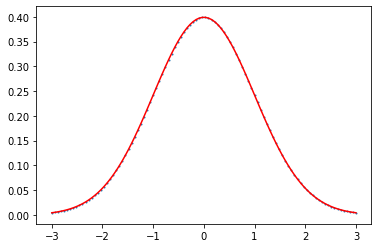

In [98]:
# Plot of original data and gaussian model fit
plt.scatter(x, y, 1)
plt.plot(x, out.best_fit, color = 'red')
plt.show()

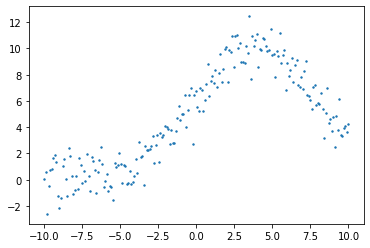

In [99]:
# Generate a gaussian function with a random spread in data points
A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)
fig, ax = plt.subplots()
ax.scatter(x, y, s=2)

In [100]:
# Generate gaussian model based on initial guess from the data
model1 = GaussianModel()
pars1 = model1.guess(y, x=x)
out1 = model1.fit(y, pars1, x=x)
print(out1.fit_report(min_correl  = 25))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 218.687705
    reduced chi-square = 1.11008987
    Akaike info crit   = 23.8654685
    Bayesian info crit = 33.7604206
[[Variables]]
    amplitude:  100.055492 +/- 1.68108606 (1.68%) (init = 238.3695)
    center:     3.95019610 +/- 0.07358012 (1.86%) (init = 3.867231)
    sigma:      3.91849274 +/- 0.08062489 (2.06%) (init = 5.276382)
    fwhm:       9.22734508 +/- 0.18985711 (2.06%) == '2.3548200*sigma'
    height:     10.1866637 +/- 0.15956919 (1.57%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


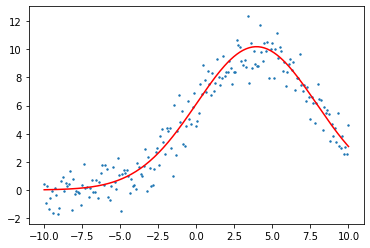

In [165]:
A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)
fig, ax = plt.subplots()
ax.scatter(x, y, s=2)
plt.plot(x, out1.best_fit, color = 'red') # Plot of best fit

In [152]:
# Generation of random set of input data
np.random.seed(0)
x = np.linspace(0, 20.0, 601)

# Generate a multipeak function consisting of gaussian and lorentzian peaks
data = (gaussian(x, 21, 6.1, 1.2) + gaussian(x, 10, 9.6, 1.3) + lorentzian(x, 32, 15, 1) +
        np.random.normal(scale=0.1, size=x.size))

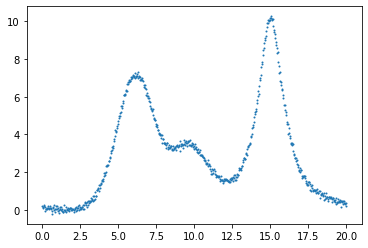

In [153]:
plt.scatter(x, data, 1)

In [160]:
# Create models

gauss_1 = GaussianModel(prefix = 'g1_')  #First Gaussian Model using input data for initial parameter guess
par = gauss_1.guess(data, x = x)

gauss_2 = GaussianModel(prefix = 'g2_') #Second Gaussian Model updating parameters from first fit
par.update(gauss_2.make_params())

par['g2_center'].set(value = 10.0, min = 7.5, max = 12.0) # Setting mean for second gaussian with min/max range
par['g2_sigma'].set(value = 4, min = 0.1) # Setting deviation for second gaussian with min value limit
par['g2_amplitude'].set(value = 20, min = 1) # Setting amplitude for second gaussian with min value limit

lorentzian = LorentzianModel(prefix = 'l1_') # Lorentzian model
par.update(lorentzian.make_params())

par['l1_center'].set(value = 15.0, min = 13.5, max = 18.0) # Initial guess for the mean, amplitude and sigma
par['l1_sigma'].set(value = 4.0, min = 1)
par['l1_amplitude'].set(value = 40, min = 9.0)

In [161]:
model = gauss_1 + gauss_2 + lorentzian  # Combined model for the data
out = model.fit(data, par, x = x) # Best fit of input data
print(out.fit_report())

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(lorentzian, prefix='l1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7471
    # data points      = 601
    # variables        = 9
    chi-square         = 6.96927973
    reduced chi-square = 0.01177243
    Akaike info crit   = -2660.70692
    Bayesian info crit = -2621.11956
##  Warning: uncertainties could not be estimated:
    l1_sigma:      at boundary
[[Variables]]
    g1_amplitude: -7500.64092 (init = 171.0675)
    g1_center:     7.73015157 (init = 10.5062)
    g1_sigma:      1.46423496 (init = 5.45)
    g1_fwhm:       3.44800977 == '2.3548200*g1_sigma'
    g1_height:    -2043.60845 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  7531.66384 (init = 20)
    g2_center:     7.72789536 (init = 10)
    g2_sigma:      1.46754599 (init = 4)
    g2_fwhm:       3.45580664 == '2.3548200*g2_sigma'
    g2_height:     2047.43110 == '0.398

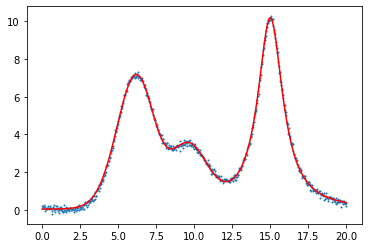

In [162]:
plt.scatter(x, data, 1)
plt.plot(x, out.best_fit, color = 'red')